#Eva Session 8 - Receptive Fields And Network Architectures

## Clone github repository

In [2]:
!git clone "https://github.com/e-lobo/eva.git"

Cloning into 'eva'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 226 (delta 86), reused 187 (delta 47), pack-reused 0
Receiving objects: 100% (226/226), 4.83 MiB | 39.25 MiB/s, done.
Resolving deltas: 100% (86/86), done.


## Import all necessary classes and utils

In [2]:
from eva.session_7.utils import DATA_MEAN, DATA_STD_DEV, display_image, print_sum ,EPOCH, LEARNING_RATE, MOMENTUM 
from eva.session_7.data_loader import Loader
from eva.session_7.test import TestCifar10
from eva.session_7.train import TrainCifar10
from eva.session_8.model import res_net_18
from eva.session_8.transforms import train_transforms,test_transforms

## Load the Cifar 10 Data Set

In [3]:
loader = Loader(res_net_18,train_transforms(DATA_MEAN,DATA_STD_DEV),test_transforms(DATA_MEAN,DATA_STD_DEV),{'pin_memory':True},{'pin_memory':True})

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Displaying some images from the train set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 frog plane horse  bird  deer   dog horse  bird horse   dog   dog   dog plane   cat   dog  ship horse   cat   car plane  bird   cat  frog plane   dog horse  ship truck  bird truck  deer plane   car  frog truck truck plane  bird  deer  bird  ship   dog  frog plane  frog   car   dog truck  bird   dog   cat  bird  frog  deer  frog   dog  frog truck  deer  deer horse  bird plane  ship


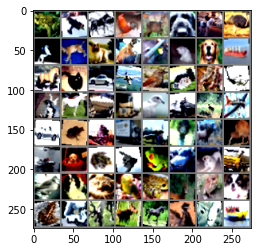

In [4]:
display_image(loader.train_loader)

## Torch Summary of the Model

In [5]:
print_sum(loader.model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Train and Test the model

In [3]:
train_cifar = TrainCifar10(loader.device, loader.model, loader.train_loader)
test_cifar = TestCifar10(loader.device,loader.model,loader.test_loader)
train_cifar.train(30,test_cifar,0.01,0.9)

  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -502427524.3520, Accuracy: 1193/10000 (11.93%)

EPOCH: 2


Loss=-2594161295360.0 Batch_id=781 Accuracy=10.12: 100%|██████████| 782/782 [01:04<00:00, 12.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -2672848164356.0962, Accuracy: 1000/10000 (10.00%)

EPOCH: 3


Loss=-5559005699112960.0 Batch_id=695 Accuracy=10.12:  89%|████████▉ | 695/782 [00:58<00:07, 11.86it/s]

KeyboardInterrupt: ignored